In [39]:
import pandas as pd
import analysis_util
import config
import seaborn as sns

In [40]:
df = pd.read_csv(config.SYNTHETIC_DATASET_ARTIFACT, index_col=0)

df.head()

hash  \
0  9a581830e4fa02eed501b4e1f546a2e2ea358e13   
1  37067a53c4b3b99982ef8e1f431ba0c9302b66e8   
2  82e350064cb8d1622c7cde275567ae594483fe62   
3  cf98f5e3705603ae21bef9b0a577bcd001a8c92e   
4  c17a80f47b772d759aeb0878aa767a768a6fdd0c   

                                repo  \
0  bitcoinunlimited/bitcoinunlimited   
1                   mesonbuild/meson   
2             mycroftai/mycroft-core   
3                   mesonbuild/meson   
4                   mesonbuild/meson   

                                    commit_msg_start  \
0  Add extensive test option to parallel RPC test...   
1  Refactor argument parsing and command executio...   
2  Add helper functions for disk space management...   
3  Update path resolution for non-Windows systems...   
4  Add support for VS2017 architecture detection\...   

                                      commit_msg_end  \
0  Add new block attack patterns\n\n- Added test ...   
1  Introduce unified argument parsing in meson\n\...   
2  Refactor file_utils.py\n\n- Add helper functio...   
3  Enable loading crossfiles for all platforms ex...   
4  Add support for VS2017 architecture detection....   

                                session  \
0  032e60d7-621a-46b6-972f-7590cfaf6458   
1  5d7f1209-4ed9-4620-87ca-975f029c7f6f   
2  93b1c57c-e56c-4d75-89a6-ae1158b4fa74   
3  5d7f1209-4ed9-4620-87ca-975f029c7f6f   
4  16e57250-21ff-4cdd-ae0d-760cabcc6160   

                                  commit_msg_history  \
0  [{"t": "-", "p": 4, "c": "e", "ts": "2024-04-0...   
1                                                 []   
2  [{"t": "+", "p": 0, "c": "R", "ts": "2024-04-0...   
3                                                 []   
4  [{"t": "-", "p": 45, "c": "\n", "ts": "2024-04...   

                    loaded_ts                submitted_ts  edit_time_hist  \
0  2024-04-04T19:48:31.180017  2024-04-04T19:50:32.925989         59468.0   
1  2024-04-15T16:50:17.208813  2024-04-15T15:29:02.014310             0.0   
2  2024-04-04T19:52:38.276314  2024-04-04T19:57:02.449096        133655.0   
3  2024-04-15T17:42:14.482856  2024-04-15T15:29:02.014310             0.0   
4  2024-04-15T15:47:31.022477  2024-04-15T15:53:08.796895        163218.0   

   edit_time  ... rel_edittime_ind_rouge2_pearson  \
0   121745.0  ...                        0.144106   
1        NaN  ...                        0.144106   
2   264172.0  ...                        0.144106   
3        NaN  ...                        0.144106   
4   337774.0  ...                        0.144106   

   rel_edittime_ind_rouge2_spearman  rel_edittime_ind_rougeL_pearson  \
0                           0.23866                        -0.039658   
1                           0.23866                        -0.039658   
2                           0.23866                        -0.039658   
3                           0.23866                        -0.039658   
4                           0.23866                        -0.039658   

  rel_edittime_ind_rougeL_spearman  rel_edittime_ind_bertscore_pearson  \
0                        -0.013197                           -0.100207   
1                        -0.013197                           -0.100207   
2                        -0.013197                           -0.100207   
3                        -0.013197                           -0.100207   
4                        -0.013197                           -0.100207   

   rel_edittime_ind_bertscore_spearman  rel_edittime_ind_chrF_pearson  \
0                             0.032695                       0.009058   
1                             0.032695                       0.009058   
2                             0.032695                       0.009058   
3                             0.032695                       0.009058   
4                             0.032695                       0.009058   

   rel_edittime_ind_chrF_spearman  rel_edittime_ind_ter_pearson  \
0                       -0.026513                     -0.019534   
1           

In [41]:
len(set(df['session'].to_list()))

12

In [42]:
GOLDEN = df[((df['end_to_start'] == False) & (df['start_to_end'] == False))]
GOLDEN_E2S = df[((df['end_to_start'] == False) & (df['start_to_end'] == False)) | ((df['end_to_start'] == True) & (df['start_to_end'] == False))]
ALL = df

<Axes: xlabel='edittime_related', ylabel='editdist_related'>

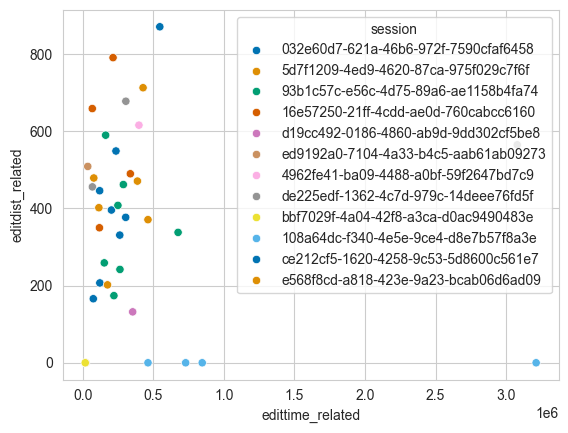

In [43]:
sns.scatterplot(data=GOLDEN, x='edittime_related', y='editdist_related', hue='session', palette='colorblind')

In [44]:
grouped = pd.concat(axis=1, objs={
"Golden": analysis_util.get_correlations_df(GOLDEN, right_side='ind'),
"Golden + Backward": analysis_util.get_correlations_df(GOLDEN_E2S, right_side='ind'),
"All data": analysis_util.get_correlations_df(ALL, right_side='ind'),
})

grouped.loc['editdist']

Golden           Golden + Backward            All data  \
               spearman   pearson          spearman   pearson  spearman   
independent                                                               
bertscore     -0.365381 -0.269957         -0.378203 -0.290310 -0.343406   
bleu           0.236109  0.246660          0.238727  0.187200  0.338027   
chrF          -0.361981 -0.291860         -0.277714 -0.192040 -0.175781   
editdist       0.747807  0.710624          0.792768  0.797605  0.883714   
editdist-norm  0.575983  0.539631          0.481395  0.415058  0.444490   
meteor         0.099908  0.210290         -0.011062  0.172998  0.072144   
rouge1        -0.235297 -0.195012         -0.195539 -0.169324 -0.127710   
rouge2         0.297922  0.334091          0.197169  0.142017  0.293727   
rougeL        -0.107294 -0.059070         -0.195589 -0.168861 -0.153277   
ter            0.632818  0.498689          0.593238  0.456480  0.598846   

                         
                pearson  
independent              
bertscore     -0.232547  
bleu           0.269736  
chrF          -0.071155  
editdist       0.879479  
editdist-norm  0.363488  
meteor         0.264994  
rouge1        -0.107605  
rouge2         0.201313  
rougeL        -0.145834  
ter            0.409912

In [45]:
print(grouped.loc['editdist'].sort_values(
	by=('Golden', 'pearson'), ascending=False
)['Golden'][['pearson', 'spearman']].to_latex(float_format="%.3f"))

\begin{tabular}{lrr}
\toprule
 & pearson & spearman \\
independent &  &  \\
\midrule
editdist & 0.711 & 0.748 \\
editdist-norm & 0.540 & 0.576 \\
ter & 0.499 & 0.633 \\
rouge2 & 0.334 & 0.298 \\
bleu & 0.247 & 0.236 \\
meteor & 0.210 & 0.100 \\
rougeL & -0.059 & -0.107 \\
rouge1 & -0.195 & -0.235 \\
bertscore & -0.270 & -0.365 \\
chrF & -0.292 & -0.362 \\
\bottomrule
\end{tabular}



In [46]:
print(grouped.loc['editdist'].sort_values(
	by=('Golden + Backward', 'pearson'), ascending=False
)['Golden + Backward'][['pearson', 'spearman']].to_latex(float_format="%.3f"))

\begin{tabular}{lrr}
\toprule
 & pearson & spearman \\
independent &  &  \\
\midrule
editdist & 0.798 & 0.793 \\
ter & 0.456 & 0.593 \\
editdist-norm & 0.415 & 0.481 \\
bleu & 0.187 & 0.239 \\
meteor & 0.173 & -0.011 \\
rouge2 & 0.142 & 0.197 \\
rougeL & -0.169 & -0.196 \\
rouge1 & -0.169 & -0.196 \\
chrF & -0.192 & -0.278 \\
bertscore & -0.290 & -0.378 \\
\bottomrule
\end{tabular}



In [47]:
print(grouped.loc['editdist'].sort_values(
	by=('All data', 'pearson'), ascending=False
)['All data'][['pearson', 'spearman']].to_latex(float_format="%.3f"))

\begin{tabular}{lrr}
\toprule
 & pearson & spearman \\
independent &  &  \\
\midrule
editdist & 0.879 & 0.884 \\
ter & 0.410 & 0.599 \\
editdist-norm & 0.363 & 0.444 \\
bleu & 0.270 & 0.338 \\
meteor & 0.265 & 0.072 \\
rouge2 & 0.201 & 0.294 \\
chrF & -0.071 & -0.176 \\
rouge1 & -0.108 & -0.128 \\
rougeL & -0.146 & -0.153 \\
bertscore & -0.233 & -0.343 \\
\bottomrule
\end{tabular}

